## Regression

In [223]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

# request_name : (<coefficient>, <avg_rate>)

specs = np.array([
("products/science.html" ,     1.0, 110.0),
("products/non-fiction.html",  2.0, 20.0),
("products/fiction.html",      4.0, 30.0),
("api/comment",                5.0, 35.0),
("api/product/get.php",        6.0, 50.0),
("resources/js/basket.js",     10.0, 20.7)], dtype=object)

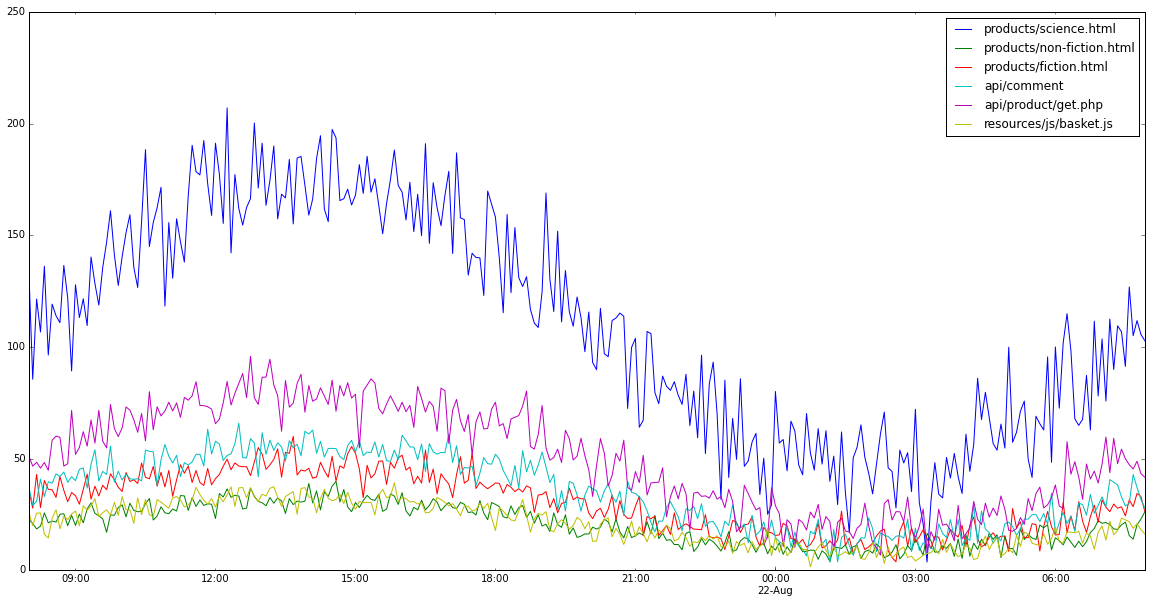

In [224]:
N = 12 * 24
rates = np.array([(np.full(N, 1.0) + 0.6 * np.sin(np.arange(0, 2 * np.pi, 2 * np.pi / N)) + 0.15 * np.random.normal(size=N)) * rate
    for rate in specs[:,2]])

rates[rates < 0] = 0
df = pd.DataFrame(rates.T, columns=specs[:,0])
df.index = pd.date_range('21/8/2016 08:00', periods=N, freq='5T')
df.plot(figsize=(20,10))

In [225]:
cpu = df.values.dot(specs[:,1])
cpu = cpu / (np.max(cpu)) * 54
cpu += 4 * np.random.normal(size=N)

cpu[cpu < 0] = 0.0

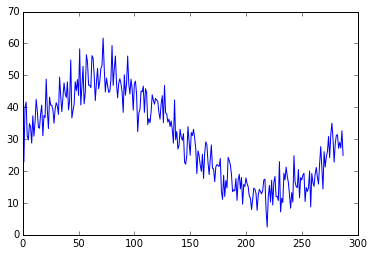

In [226]:
plt.plot(cpu)

In [227]:
df['CPU'] = pd.Series(cpu, index=df.index)

In [228]:
df.to_csv("data/request_rate_vs_CPU.csv")